In [1]:
%load_ext rpy2.ipython

In [3]:
%%R
library(dplyr)
library(scales)
library(grid)
library(ggplot2)
library(gridExtra)
library(magrittr)
library(readr)
library(ggsignif)
library(readxl)

In [4]:
%%R
data = read_csv("data/AfaDVload.csv")

data = tbl_df(data)

glimpse(data)

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  SampleName = col_character(),
  Species = col_character(),
  CommonName = col_character(),
  CollectionLocation = col_character(),
  Health = col_character(),
  SampleType = col_character(),
  SampleAmount = col_character(),
  Elution = col_character()
)

R[write to console]: See spec(...) for full column specifications.



Observations: 219
Variables: 22
$ SampleName         <chr> "SML42", "OGL2", "MYA49", "SML214", "SML08", "MYA5…
$ Species            <chr> "Asterias vulgaris", "Asterias forbesi", "Asterias…
$ CommonName         <chr> "Northern Star", "Forbes Star", "Forbes Star", "No…
$ CollectionLocation <chr> "SML", "MA", "SC", "SML", "SML", "SC", "MA", "SC",…
$ CollectionYear     <dbl> 2016, 2016, 2012, 2016, 2016, 2013, 2016, 2012, 20…
$ Health             <chr> "Aymptomatic", "Aymptomatic", "Symptomatic", "Aymp…
$ AnimalSize         <dbl> 6.2, 6.0, NA, 7.0, 7.0, NA, 6.5, NA, 5.5, NA, 8.3,…
$ SampleType         <chr> "E", "G", "G", "E", "E", "G", "G", "E", "E", "PC",…
$ SampleAmount       <chr> "66.5 mg", "77.6 mg", "75.5 mg", "82.5 mg", "72.1 …
$ Elution            <chr> "30 ul", "30 ul", "30 ul", "30 ul", "30 ul", "30 u…
$ `eff%`             <dbl> 71.804, 84.295, 132.787, 79.865, 71.804, 132.787, …
$ `R2 standards`     <dbl> 0.960, 0.971, 0.984, 0.956, 0.960, 0.984, 0.983, 0…
$ `run#`            

In [11]:
%%R
data2 = read_excel("data/Sample Metadata Full.xlsx")

data2 = tbl_df(data2)

glimpse(data2)

Observations: 368
Variables: 16
$ `Sample#`          <chr> "OGL1", "OGL2", "OGL3", "OGL4", "OGL5", "OGL6", "O…
$ `Animal#`          <dbl> 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 7,…
$ CollectionLocation <chr> "Nahant, MA", "Nahant, MA", "Nahant, MA", "Nahant,…
$ CollectionYear     <dttm> 2016-07-07, 2016-07-07, 2016-07-07, 2016-07-07, 2…
$ Species            <chr> "Asterias forbesi", "Asterias forbesi", "Asterias …
$ SampleType         <chr> "Pyloric caeca", "Gonads", "Body Wall", "Pyloric c…
$ Health             <chr> "Healthy", "Healthy", "Healthy", "Healthy", "Healt…
$ Sex                <chr> "NA", "NA", "NA", "NA", "NA", "NA", "NA", "NA", "N…
$ AnimalSize         <chr> "6", "6", "6", "5", "5", "5", "4.7", "4.7", "4.7",…
$ CollVessel         <chr> "2 mL", "2 mL", "2 mL", "2 mL", "2 mL", "2 mL", "2…
$ OGLSampleID        <chr> "S23233", "S23233", "S23233", "S23234", "S23234", …
$ `Subsample(mg)`    <chr> "64.8", "77.599999999999994", "70.3", "64.59999999…
$ DNAExtractionKit  

In [18]:
%%R
data2$SampleType = as.character(data2$SampleType)
data2$LogViralLoad = as.numeric(as.character(data2$LogViralLoad))
data2$AnimalSize = as.numeric(as.character(data2$AnimalSize))
glimpse(data2)

Observations: 265
Variables: 16
$ `Sample#`          <chr> "OGL1", "OGL2", "OGL3", "OGL4", "OGL5", "OGL6", "O…
$ `Animal#`          <dbl> 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 7,…
$ CollectionLocation <chr> "Nahant, MA", "Nahant, MA", "Nahant, MA", "Nahant,…
$ CollectionYear     <dttm> 2016-07-07, 2016-07-07, 2016-07-07, 2016-07-07, 2…
$ Species            <chr> "Asterias forbesi", "Asterias forbesi", "Asterias …
$ SampleType         <chr> "Pyloric caeca", "Gonads", "Body Wall", "Pyloric c…
$ Health             <chr> "Healthy", "Healthy", "Healthy", "Healthy", "Healt…
$ Sex                <chr> "NA", "NA", "NA", "NA", "NA", "NA", "NA", "NA", "N…
$ AnimalSize         <dbl> 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 4.7, 4.7, 4.7, 4.8, …
$ CollVessel         <chr> "2 mL", "2 mL", "2 mL", "2 mL", "2 mL", "2 mL", "2…
$ OGLSampleID        <chr> "S23233", "S23233", "S23233", "S23234", "S23234", …
$ `Subsample(mg)`    <chr> "64.8", "77.599999999999994", "70.3", "64.59999999…
$ DNAExtractionKit  

In [32]:
%%R
data$SampleType = as.factor(data$SampleType)

In [33]:
%%R
data$SampleType

  [1] E    G    G    E    E    G    G    E    E    PC   G    E    G    G    G   
 [16] E    E    E    <NA> E    G    G    E    E    G    PC   PC   E    E    E   
 [31] G    E    E    PC   E    G    E    E    PC   G    PC   E    G    PC   <NA>
 [46] E    G    E    PC   E    E    G    G    E    PC   E    G    E    E    E   
 [61] G    E    E    PC   E    E    PC   E    G    PC   E    G    G    E    PC  
 [76] PC   PC   PC   E    <NA> G    PC   PC   PC   G    G    G    PC   PC   PC  
 [91] E    PC   PC   PC   E    PC   PC   <NA> <NA> E    PC   E    PC   PC   E   
[106] PC   E    PC   <NA> G    <NA> PC   PC   PC   G    G    G    PC   E    G   
[121] E    PC   E    E    PC   PC   G    PC   E    G    E    E    PC   <NA> E   
[136] E    G    G    E    PC   E    PC   E    E    PC   PC   E    E    PC   E   
[151] PC   PC   E    PC   E    E    G    PC   G    PC   E    E    E    PC   E   
[166] G    E    E    PC   PC   <NA> E    PC   PC   E    PC   PC   <NA> PC   PC  
[181] PC   <NA> PC   <NA> PC

In [34]:
%%R
qPCR = data %>%
  filter(!is.na(SampleType))
qPCR

# A tibble: 200 x 22
   SampleName Species CommonName CollectionLocat… CollectionYear Health
   <chr>      <chr>   <chr>      <chr>                     <dbl> <chr> 
 1 SML42      Asteri… Northern … SML                        2016 Aympt…
 2 OGL2       Asteri… Forbes St… MA                         2016 Aympt…
 3 MYA49      Asteri… Forbes St… SC                         2012 Sympt…
 4 SML214     Asteri… Northern … SML                        2016 Aympt…
 5 SML08      Asteri… Northern … SML                        2016 Aympt…
 6 MYA58      Asteri… Forbes St… SC                         2013 Sympt…
 7 OGL81      Asteri… Forbes St… MA                         2016 Aympt…
 8 MYA14      Asteri… Forbes St… SC                         2012 Sympt…
 9 SML155     Asteri… Northern … SML                        2016 Aympt…
10 NEA5       Asteri… Northern … MA                         2016 Sympt…
# … with 190 more rows, and 16 more variables: AnimalSize <dbl>,
#   SampleType <fct>, SampleAmount <chr>, Elution 

In [35]:
%%R
is.finite(qPCR$SampleType)

  [1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [91] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[106] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[121] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[136] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[151] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[166] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[181] TRUE TRUE TRUE TRUE TR

In [36]:
%%R
qPCRsummary = qPCR %>%
 group_by(SampleType) %>%
 filter(SampleType %in% c("G","PC","E")) %>%
 summarise(avg = mean(Log), sd = sd(Log), sem = sd(Log)/sqrt(length(Log))) %>%
 arrange(desc(avg))

qPCRsummary

# A tibble: 3 x 4
  SampleType   avg    sd    sem
  <fct>      <dbl> <dbl>  <dbl>
1 PC          3.31 0.937 0.0999
2 E           2.56 0.665 0.0779
3 G           2.34 0.528 0.0845


## ANOVA followed by Games-Howell or Tukey Post Hoc on Log10 values

#### ANOVA

In [37]:
%%R 
qPCR.log.aov = aov(Log~SampleType,data=qPCR,var.equal=TRUE)
summary(qPCR.log.aov)

             Df Sum Sq Mean Sq F value   Pr(>F)    
SampleType    2  35.11  17.556   29.11 8.38e-12 ***
Residuals   197 118.80   0.603                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#### Normal distribution of data. Variances look equal between categories but it is very close to being unequal

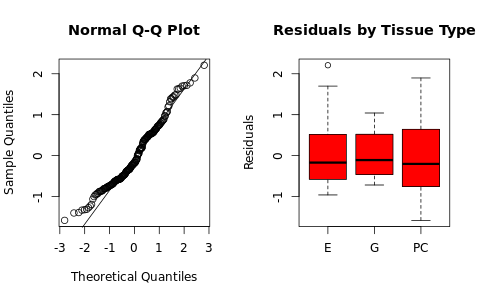

In [65]:
%%R -h 300
par(mfrow=c(1,2))

q = qqnorm(resid(qPCR.log.aov),cex=1.2)
qqline(resid(qPCR.log.aov))

p = boxplot(split(resid(qPCR.log.aov),qPCR$SampleType),ylab="Residuals",col=2)
title("Residuals by Tissue Type")

#### Games-Howell Post Hoc

In [71]:
%%R

#def function: Games-Howell post hoc

posthoc.tgh <- function(y, x, method=c("games-howell", "tukey"), digits=2) {
  ### Based on http://www.psych.yorku.ca/cribbie/6130/games_howell.R
  method <- tolower(method);
  tryCatch(method <- match.arg(method), error=function(err) {
    stop("Argument for 'method' not valid!");
  });

  res <- list(input = list(x=x, y=y, method=method, digits=digits));

  res$intermediate <- list(x = factor(x[complete.cases(x,y)]),
                               y = y[complete.cases(x,y)]);
      res$intermediate$n <- tapply(y, x, length);
      res$intermediate$groups <- length(res$intermediate$n);
      res$intermediate$df <- sum(res$intermediate$n) - res$intermediate$groups;
      res$intermediate$means <- tapply(y, x, mean);
      res$intermediate$variances <- tapply(y, x, var);

  res$intermediate$pairNames <- combn(levels(res$intermediate$x),
                                      2, paste0, collapse=":");

  res$intermediate$descriptives <- cbind(res$intermediate$n,
                                         res$intermediate$means,
                                         res$intermediate$variances);
  rownames(res$intermediate$descriptives) <- levels(res$intermediate$x);
  colnames(res$intermediate$descriptives) <- c('n', 'means', 'variances');

  ### Start on Tukey
  res$intermediate$errorVariance <-
    sum((res$intermediate$n-1) * res$intermediate$variances) /
    res$intermediate$df;
  res$intermediate$t <- combn(res$intermediate$groups, 2, function(ij) {
    abs(diff(res$intermediate$means[ij]))/
      sqrt(res$intermediate$errorVariance*sum(1/res$intermediate$n[ij]));
  } );
  res$intermediate$p.tukey <- ptukey(res$intermediate$t*sqrt(2),
                                     res$intermediate$groups,
                                     res$intermediate$df,
                                     lower.tail=FALSE);
    res$output <- list();
      res$output$tukey <- cbind(res$intermediate$t,
                                res$intermediate$df,
                                res$intermediate$p.tukey)                                     
      rownames(res$output$tukey) <- res$intermediate$pairNames;
      colnames(res$output$tukey) <- c('t', 'df', 'p');

  ### Start on Games-Howell
  res$intermediate$df.corrected <- combn(res$intermediate$groups, 2, function(ij) {               
    sum(res$intermediate$variances[ij] /
          res$intermediate$n[ij])^2 / 
      sum((res$intermediate$variances[ij] /
             res$intermediate$n[ij])^2 / 
            (res$intermediate$n[ij]-1));
  } );
  res$intermediate$t.corrected <- combn(res$intermediate$groups, 2, function(ij) {               
    abs(diff(res$intermediate$means[ij]))/
      sqrt(sum(res$intermediate$variances[ij] /
                 res$intermediate$n[ij]));
  } );    
  res$intermediate$p.gameshowell <- ptukey(res$intermediate$t.corrected*sqrt(2),
                                           res$intermediate$groups,
                                           res$intermediate$df.corrected,
                                           lower.tail=FALSE)  
  res$output$games.howell <- cbind(res$intermediate$t.corrected,
                                   res$intermediate$df.corrected,
                                   res$intermediate$p.gameshowell);
  rownames(res$output$games.howell) <- res$intermediate$pairNames;
  colnames(res$output$games.howell) <- c('t', 'df', 'p');

  ### Set class and return object
  class(res) <- 'posthocTukeyGamesHowell';
  return(res);

}

print.posthocTukeyGamesHowell <- function(x, digits=x$input$digits, ...) {
  print(x$intermediate$descriptives, digits=digits);
  cat('\n');
  if (x$input$method == 'tukey') {
    print(x$output$tukey);
  }
  else if (x$input$method == 'games-howell') {
    print(x$output$games.howell, digits=digits);
  }
}

posthoc.tgh(y=qPCR$Log, x=qPCR$SampleType);

    n means variances
E  73   2.6      0.44
G  39   2.3      0.28
PC 88   3.3      0.88

       t  df       p
E:G  1.9  94 1.3e-01
E:PC 5.9 156 5.6e-08
G:PC 7.4 118 5.2e-11


#### Tukey's Test

In [85]:
%%R
tukey.test = TukeyHSD(qPCR.log.aov)
tukey.test

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Log ~ SampleType, data = qPCR, var.equal = FALSE)

$SampleType
           diff        lwr       upr     p adj
G-E  -0.2229434 -0.5866883 0.1408014 0.3187234
PC-E  0.7511504  0.4608205 1.0414802 0.0000000
PC-G  0.9740938  0.6213091 1.3268785 0.0000000



## Kruskal Wallis followed by Pairwise Wilcoxon test

#### Kruskal Wallis

In [66]:
%%R
kw = kruskal.test(Log ~ SampleType, data = qPCR)
kw


	Kruskal-Wallis rank sum test

data:  Log by SampleType
Kruskal-Wallis chi-squared = 41.515, df = 2, p-value = 9.665e-10



#### Wilcoxon post hoc 

In [73]:
%%R
pairwise.wilcox.test(qPCR$Log,qPCR$SampleType,p.adjust.method="bonferroni")


	Pairwise comparisons using Wilcoxon rank sum test 

data:  qPCR$Log and qPCR$SampleType 

   E       G      
G  0.26    -      
PC 1.5e-06 9.8e-08

P value adjustment method: bonferroni 


## Figure Plots

#### Load Prevalence Data

In [11]:
%%R
qPCRprev = read.csv("data/AfaDVprev.csv")

qPCRprev

  Tissue.Type Absent Present Total Prevalence Prevalence2
1          CF     28       0    28       0.00           0
2           E     32      73   105       0.70          70
3           G     30      39    69       0.57          57
4          PC     14      88   102       0.86          86


In [587]:
%%R
qPCR.pico = lm(Log ~ pico, data = qPCR)
summary(qPCR.pico)


Call:
lm(formula = Log ~ pico, data = qPCR)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.50617 -0.69907 -0.07558  0.60306  1.93140 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.1126707  0.0932818  33.368   <2e-16 ***
pico        -0.0003890  0.0002164  -1.798   0.0749 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9086 on 113 degrees of freedom
  (104 observations deleted due to missingness)
Multiple R-squared:  0.02781,	Adjusted R-squared:  0.01921 
F-statistic: 3.232 on 1 and 113 DF,  p-value: 0.07487



#### Load PicoGreen Data

In [97]:
%%R
DNA = read_excel("data/DNAconcMetaDataAfaDV.xlsx")
DNA = data.frame(DNA)
head(DNA)
DNA$SampleType = as.factor(DNA$Sample.Type)
DNA$DNAconc = as.numeric(DNA$DNAconc)

In [101]:
%%R
DNA = DNA %>%
  filter(!is.na(DNAconc))
head(DNA)

  Sample.. Animal.. Collection.Location Collection.Year          Species
1     OGL3        1          Nahant, MA      2016-07-07 Asterias forbesi
2     OGL6        2          Nahant, MA      2016-07-07 Asterias forbesi
3     OGL9        3          Nahant, MA      2016-07-07 Asterias forbesi
4    OGL12        4          Nahant, MA      2016-07-07 Asterias forbesi
5    OGL15        5          Nahant, MA      2016-07-07 Asterias forbesi
6    OGL27       15          Nahant, MA      2016-07-12 Asterias forbesi
  Sample.Type  Health Sex          Size..cm. Coll.Vessel OGL.Sample.ID
1   Body Wall Healthy  NA                  6        2 mL        A26951
2   Body Wall Healthy  NA                  5        2 mL        A26952
3   Body Wall Healthy  NA                4.7        2 mL        A26953
4   Body Wall Healthy  NA                4.8        2 mL        A26954
5   Body Wall Healthy  NA 4.5999999999999996        2 mL        A26955
6   Body Wall Healthy  NA                3.9        2 mL       

In [102]:
%%R
qPCRDNA = DNA %>%
  group_by(Sample.Type) %>%
  summarize(n= n(),mean = mean(DNAconc),sd = sd(DNAconc),sem = sd(DNAconc)/sqrt(n))
qPCRDNA

# A tibble: 4 x 5
  Sample.Type        n  mean    sd   sem
  <chr>          <int> <dbl> <dbl> <dbl>
1 Body Wall         96  4.63  11.7  1.19
2 Coelomic Fluid    36  4.70  10.5  1.75
3 Gonads            69 16.6   20.5  2.46
4 Pyloric caeca     97  6.27  10.2  1.04


## DNA Concentration Plot

R[write to console]: Warning:
R[write to console]:  Ignoring unknown aesthetics: y



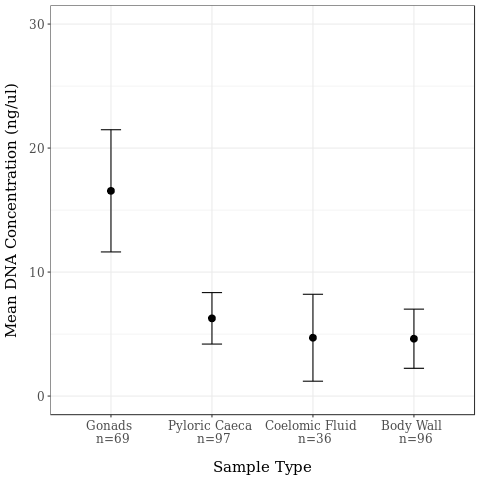

In [107]:
%%R
p = ggplot(qPCRDNA, aes(x=reorder(Sample.Type, -mean), y=mean))

#p = p + geom_signif(comparisons = list(c("Gonads","Body Wall")),y_position = 25, annotations="***") + 
#                  geom_signif(comparisons = list(c("Gonads","Coelomic Fluid")),y_position =23 ,annotations="**") +
#                  geom_signif(comparisons = list(c("Pyloric caeca","Body Wall")),y_position =15,annotations="***")


p = p + geom_errorbar(aes(y = mean, ymin = mean-(2*sem), ymax = mean+(2*sem)), color = "black", width = 0.2, data = qPCRDNA)

p = p + geom_point(size = 3)

p = p + theme_bw() + theme(text=element_text(size=15, color="black",family = "Times"),
                           axis.title.y=element_text(margin=margin(0,10,0,0)),
                           axis.title.x=element_text(margin=margin(15,0,0,0)))

p = p + scale_y_continuous(name ="Mean DNA Concentration (ng/ul)", limits = c(0,30)) + xlab("Sample Type")

p = p + scale_x_discrete(breaks=c("Body Wall", "Gonads", "Pyloric caeca","Coelomic Fluid"),
                         labels=c("Body Wall \n n=96", "Gonads \n n=69", 
                                  "Pyloric Caeca \n n=97","Coelomic Fluid \n n=36"))

p

## Tissue Type and Prevalence Plot

R[write to console]: Warning:
R[write to console]:  Ignoring unknown aesthetics: y

R[write to console]: Warning:
R[write to console]:  Ignoring unknown aesthetics: ymax



png 
  2 


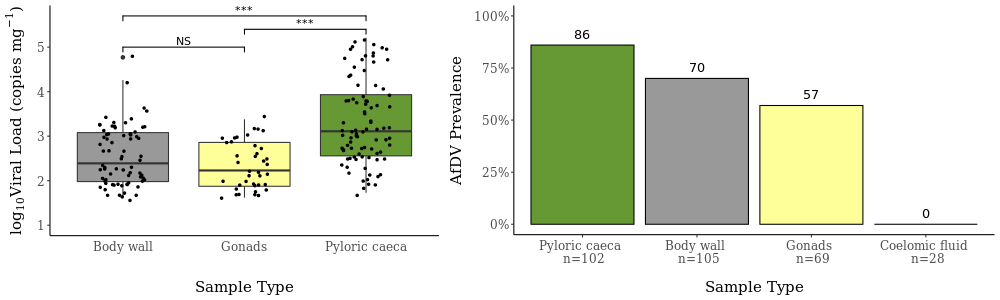

In [86]:
%%R -w 1000 -h 300

sample = c(
            `CF` = "Coelomic fluid.",
            `E` = "Body wall",
            `G` = "Gonad",
            `PC` = "Pyloric caeca")

####Plot 1#####
p = ggplot(subset(qPCR, SampleType %in% c("G","PC","E")), aes(x = SampleType,y = Log))#,color=SampleType))

p = p + geom_boxplot(aes(fill = SampleType)) + geom_point(aes(y = Log),size = 1,
                   position = position_jitter(width = 0.2, height = 0.1))

p = p + scale_color_manual(values = c("#999999","#ffff99","#669833"))

p = p + labs(y=expression(log[10]*"Viral Load (copies mg"^-1*")"))

p = p + theme_classic() + theme(text=element_text(size=15, family="Times New Roman",color="black"),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(),
                           legend.position="none",
                           axis.ticks.x = element_blank(),
                           axis.title.y=element_text(margin=margin(0,10,0,0)),
                           axis.title.x=element_text(margin=margin(27,0,0,0)))

p = p + scale_x_discrete(breaks=c("E", "G", "PC"), labels=c("Body wall", "Gonads", "Pyloric caeca"))

p = p + scale_y_continuous(limits=c(1, 5.7)) + xlab("Sample Type")

p = p + geom_signif(comparisons = list(c("G","PC")),y_position = 5.4, annotations="***") + 
                   geom_signif(comparisons = list(c("G","E")),y_position = 5,annotations="NS") + 
                   geom_signif(comparisons = list(c("E","PC")),y_position = 5.7, annotations="***")

p = p + scale_fill_manual(values = c("#999999","#ffff99","#669833"))

p

####Plot 2####
p2 = ggplot(qPCRsummary4, aes(x = SampleType,y = avg))

p2 = p2 + geom_point(aes(y = avg),size = 3, data = qPCRsummary4) + 
  geom_errorbar(aes(y = avg, ymin = avg-(1*sem), ymax = avg+(1*sem)), 
                color = "black", width = 0.3, data = qPCRsummary4)

p2 = p2 + geom_signif(comparisons = list(c("G","PC")),y_position = 20500, annotations="***") + 
                   geom_signif(comparisons = list(c("G","E")),y_position = 5000,annotations="NS") + 
                   geom_signif(comparisons = list(c("E","PC")),y_position = 22000, annotations="***")

p2 = p2 + labs(y=expression("Viral Load (copies mg"^-1*")")) + xlab("Sample Type")

p2 = p2 + theme_classic() + theme(text=element_text(size=12, family="Times New Roman",color="black"),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(),
                           legend.position="none",
                           axis.ticks.x = element_blank(),
                           axis.title.y=element_text(margin=margin(0,10,0,0)),
                           axis.title.x=element_text(margin=margin(27,0,0,0)))

p2 = p2 + scale_x_discrete(breaks=c("E", "G", "PC"), labels=c("Body wall", "Gonads", "Pyloric caeca"))

p2

####Plot 3#####

p3 = ggplot(qPCRprev, aes(x= reorder(Tissue.Type,-Prevalence),fill=Tissue.Type, y=Prevalence))

p3 = p3 + geom_bar(stat="identity", color="black")

p3 = p3 + scale_x_discrete(breaks=c("E", "G", "PC","CF"),
                         labels=c("Body wall \n n=105", "Gonads \n n=69", 
                                  "Pyloric caeca \n n=102","Coelomic fluid \n n=28"))


p3 = p3 + ylab("AfDV Prevalence") + xlab("Sample Type") 

p3 = p3 + geom_text(aes(x=Tissue.Type, y=Prevalence, ymax=Prevalence,
                      label=Prevalence2), vjust = -0.7, size=4.5) 

p3 = p3 + theme_classic() + theme(text=element_text(size=15, family="Times New Roman",color="black"),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(),
                           legend.position="none",
                           axis.title.y=element_text(margin=margin(0,10,0,0)),
                           axis.title.x=element_text(margin=margin(15,0,0,0)))

p3 = p3 + scale_y_continuous(labels = percent,limits=c(0, 1))

p3 = p3 + scale_fill_manual(labels = sample,
                           values = c("CF" = "#999999",
                                    "E" = "#999999",
                                    "G" = "#ffff99",
                                    "PC" = "#669833"))

x = grid.arrange(nrow=1, p,p3,widths=c(0.8,1))  ## switch theme_classic to theme_bw to get a border around graphs

tiff('AfDV_variables.tiff',width = 8, height =4, units = 'in', res = 500)
plot(x)
dev.off()

## Animal Size 

In [19]:
%%R
data2[data2==0] = NA
data2

# A tibble: 265 x 16
   `Sample#` `Animal#` CollectionLocat… CollectionYear      Species SampleType
   <chr>         <dbl> <chr>            <dttm>              <chr>   <chr>     
 1 OGL1              1 Nahant, MA       2016-07-07 00:00:00 Asteri… Pyloric c…
 2 OGL2              1 Nahant, MA       2016-07-07 00:00:00 Asteri… Gonads    
 3 OGL3              1 Nahant, MA       2016-07-07 00:00:00 Asteri… Body Wall 
 4 OGL4              2 Nahant, MA       2016-07-07 00:00:00 Asteri… Pyloric c…
 5 OGL5              2 Nahant, MA       2016-07-07 00:00:00 Asteri… Gonads    
 6 OGL6              2 Nahant, MA       2016-07-07 00:00:00 Asteri… Body Wall 
 7 OGL7              3 Nahant, MA       2016-07-07 00:00:00 Asteri… Pyloric c…
 8 OGL8              3 Nahant, MA       2016-07-07 00:00:00 Asteri… Gonads    
 9 OGL9              3 Nahant, MA       2016-07-07 00:00:00 Asteri… Body Wall 
10 OGL10             4 Nahant, MA       2016-07-07 00:00:00 Asteri… Pyloric c…
# … with 255 more rows, and 10 

In [20]:
%%R
data2 = data2 %>%
  filter(!is.na(LogViralLoad)) %>%
  filter(!is.na(AnimalSize))
data2

# A tibble: 179 x 16
   `Sample#` `Animal#` CollectionLocat… CollectionYear      Species SampleType
   <chr>         <dbl> <chr>            <dttm>              <chr>   <chr>     
 1 OGL1              1 Nahant, MA       2016-07-07 00:00:00 Asteri… Pyloric c…
 2 OGL2              1 Nahant, MA       2016-07-07 00:00:00 Asteri… Gonads    
 3 OGL3              1 Nahant, MA       2016-07-07 00:00:00 Asteri… Body Wall 
 4 OGL4              2 Nahant, MA       2016-07-07 00:00:00 Asteri… Pyloric c…
 5 OGL5              2 Nahant, MA       2016-07-07 00:00:00 Asteri… Gonads    
 6 OGL6              2 Nahant, MA       2016-07-07 00:00:00 Asteri… Body Wall 
 7 OGL7              3 Nahant, MA       2016-07-07 00:00:00 Asteri… Pyloric c…
 8 OGL8              3 Nahant, MA       2016-07-07 00:00:00 Asteri… Gonads    
 9 OGL9              3 Nahant, MA       2016-07-07 00:00:00 Asteri… Body Wall 
10 OGL10             4 Nahant, MA       2016-07-07 00:00:00 Asteri… Pyloric c…
# … with 169 more rows, and 10 

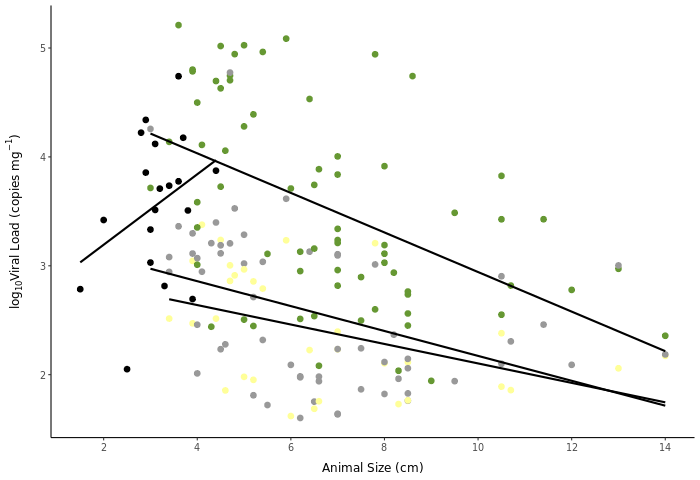

In [42]:
%%R -w 700

p = ggplot(data2, aes(x=AnimalSize, y=LogViralLoad)) + geom_point(aes(colour = factor(SampleType)), size = 2.5)

p = p + scale_x_continuous(breaks = c(0,2,4,6,8,10,12,14,16)) 

p = p + scale_color_manual(values=c('#999999','#ffff99','#669833','#000000'))

p = p + geom_smooth(method=lm,color="black",aes(fill=SampleType),se=FALSE)

p = p + theme_classic() + theme(legend.position = "none",
                                legend.key = element_blank(),
                                text=element_text(size=12),
                                axis.title.y=element_text(margin=margin(0,15,0,0)),
                                axis.title.x=element_text(margin=margin(10,0,0,0)),
                                legend.key.size = unit(0.5, "cm"))

p = p + labs(y=expression(log[10]*"Viral Load (copies mg"^-1*")"))

p = p + xlab("Animal Size (cm)")

#p = p + annotate("text", label = "y = 3.928=9 - 0.15x \n r^2 =0.166", x = 11.8, y = 5, size = 7, colour = "black")

p

#### Pearson's correlation

In [29]:
%%R
cor.test(data2$AnimalSize, data2$LogViralLoad, method = "pearson")


	Pearson's product-moment correlation

data:  data2$AnimalSize and data2$LogViralLoad
t = -5.5089, df = 177, p-value = 1.256e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5011285 -0.2499283
sample estimates:
       cor 
-0.3825762 



## Genome Coverage

In [93]:
%%R
basecov = read.table("data/bascov-Copy1.txt")
basecov = tbl_df(basecov)
glimpse(basecov)

Observations: 6,089
Variables: 3
$ V1 <fct> NODE_1_length_6089_cov_35.966, NODE_1_length_6089_cov_35.966, NODE…
$ V2 <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, …
$ V3 <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 14,…


R[write to console]: Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



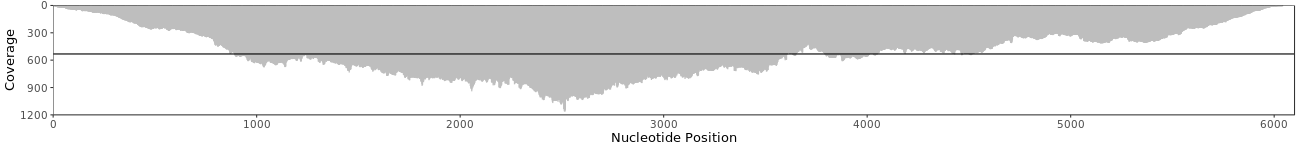

In [94]:
%%R -h 150 -w 1300

p = ggplot(basecov,aes(x=V2, y=V3))

p = p + geom_bar(fill = "black",stat="identity", colour="grey")

p = p + ylab("Coverage") + xlab("Nucleotide Position")

p = p + geom_hline(yintercept = 532) + scale_y_reverse() 

p = p + theme_bw() + theme(text=element_text(size=13, color="black"),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank(),
                           legend.position="none")

p = p + scale_x_continuous(limits = c(0,6100), breaks=c(0,1000,2000,3000,4000,5000,6000), expand = c(0, 0))

p = p + scale_y_continuous(trans = 'reverse',limits = c(1200,0), expand = c(0, 0))

p

#pdf('AfDV_Converage.pdf',width = 10, height = 1.5)
plot(p)
#dev.off()q()